# In Class Exercise 5: Systems of Linear Equations

1a) Write the Force equations using matrix equation of the form $ F = \hat{K}x - b$
F1 = −k1(x1 −L1) + k2(x2 −x1 −L2)
F2 = −k2(x2 −x1 −L2) + k3(x3 −x2 −L3)
F3 = −k3(x3 −x2 −L3) + k4(Lw −x3 −L4)
Solving on paper, we get the following for $\hat{K}$ and $b$:

$$
\hat{K}=
\begin{bmatrix}
-(k_1+k_2) & k_2 & 0\\
k_2 & -(k_2+k_3) & k_3\\
0 & k_3 & -(k_3 + k_4)
\end{bmatrix}
\mbox{ and }
b =
\begin{bmatrix}
k_1L_1 - k_2L_2 \\
k_2L_2 - k_3L_3 \\
k_3L_3 +k_4L_W-k_4L_4
\end{bmatrix}
$$

2a) Write a program to solve for the rest positions of the masses in equilibrium and the final lengths of the springs

In [84]:
import numpy as np
k_a = np.array([1,2,3,4])
L_a=np.array([1,1,1,1])
L_w_a=4

def ksolver(k,l,l_w):
    K=np.array([[
        -(k[0]+k[1]),k[1],0],
        [k[1], -(k[1]+k[2]),k[2]],
        [0,k[2],-(k[2]+k[3])]
    ])

    b=-np.array(
        [k[0]*l[0]-k[1]*l[1],
         k[1]*l[1] - k[2]*l[2],
         k[2]*l[2] + k[3]*l_w-k[3]*l[3]]
    )


    invk= np.linalg.inv(K)
    xs= invk @ b




    springlengths=np.array([xs[0],xs[1]-xs[0],xs[2]-xs[1],l_w-xs[2]])

    return xs,springlengths
ksolver(k_a,L_a,L_w_a)


(array([1., 2., 3.]), array([1., 1., 1., 1.]))

In [85]:
k_b = np.array([1,2,3,4])
L_b=np.array([1,1,1,1])
L_w_b=10
ksolver(k_b,L_b,L_w_b)

(array([3.88, 6.32, 8.28]), array([3.88, 2.44, 1.96, 1.72]))

In [86]:
k_c = np.array([1,1,1,1])
L_c=np.array([2,2,1,1])
L_w_c=4
ksolver(k_c,L_c,L_w_c)

(array([1.5, 3. , 3.5]), array([1.5, 1.5, 0.5, 0.5]))

In [87]:
k_d = np.array([1,1,1,0])
L_d=np.array([2,2,1,1])
L_w_d=4
ksolver(k_d,L_d,L_w_d)

(array([2., 4., 5.]), array([ 2.,  2.,  1., -1.]))

In [88]:
k_e = np.array([0,1,1,0])
L_e=np.array([2,2,1,1])
L_w_e=4
ksolver(k_e,L_e,L_w_e)

LinAlgError: Singular matrix

4. Challenge Question:
Frw = −k4(Lw −x3 −L4)

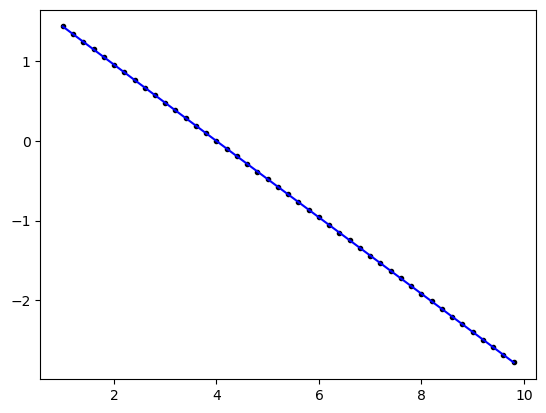

In [89]:
import matplotlib.pyplot as plt
def ksolverF(k,l,l_w):
    K=np.array([[
        -(k[0]+k[1]),k[1],0],
        [k[1], -(k[1]+k[2]),k[2]],
        [0,k[2],-(k[2]+k[3])]
    ])

    b=-np.array(
        [k[0]*l[0]-k[1]*l[1],
         k[1]*l[1] - k[2]*l[2],
         k[2]*l[2] + k[3]*l_w-k[3]*l[3]]
    )


    invk= np.linalg.inv(K)
    xs= invk @ b




    springlengths=np.array([xs[0],xs[1]-xs[0],xs[2]-xs[1],l_w-xs[2]])
    F_rw=-k[3]*(l_w-xs[2]-l[3])
    L_0= np.sum(l)
    k_0=1/(1/k[0]+1/k[1]+1/k[2]+1/k[3])

    F_equiv= -k_0*(l_w-L_0)

    return F_rw,F_equiv
k_a = np.array([1,2,3,4])
L_a=np.array([1,1,1,1])
L_w_a=4


lwsArray=np.arange(1,10,0.2)
Fs=np.empty(lwsArray.shape)
Fq=np.empty(lwsArray.shape)

for i,lw in enumerate(lwsArray):
    Fs[i],Fq[i]= ksolverF(k_a,L_a,lw)

plt.figure()
plt.plot(lwsArray,Fs,'k.')
plt.plot(lwsArray,Fq,'b-')

